<a href="https://colab.research.google.com/github/hjlinq/WordCloud/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
#!pip install fileupload
#!pip install ipywidgets
#!jupyter nbextension install --py --user fileupload
#!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
#import fileupload
#from fileupload import FileUploadWidget
import io
import sys

from google.colab import files

In [ ]:
!wget https://www.gutenberg.org/cache/epub/2017/pg2017.txt

txtfilename = "/content/pg2017.txt"
txtfile = open(txtfilename, "r")
file_contents = txtfile.read()
file_contents

--2022-02-24 17:28:09--  https://www.gutenberg.org/cache/epub/2017/pg2017.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88062 (86K) [text/plain]
Saving to: ‘pg2017.txt’

pg2017.txt          100%[===================>]  86.00K  --.-KB/s    in 0.07s   

2022-02-24 17:28:09 (1.27 MB/s) - ‘pg2017.txt’ saved [88062/88062]



'\ufeffThe Project Gutenberg EBook of The Dhammapada, by Unknown\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: The Dhammapada\n\nAuthor: Unknown\n\nTranslator: F. Max Muller\n\nPosting Date: October 1, 2008 [EBook #2017]\nRelease Date: December, 1999\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK THE DHAMMAPADA ***\n\n\n\n\nProduced by Tom Weiss\n\n\n\n\n\nTHE DHAMMAPADA\n\nA Collection of Verses Being One of the Canonical Books of the Buddhists\n\nTranslated from Pali by F. Max Muller\n\n\nFrom:\n\n     The Sacred Books of the East\n     Translated by Various Oriental Scholars\n     Edited by F. Max Muller\n     Volume X\n     Part I\n\n\n\n\n[Note: The introduction, notes and index have been omitted.]\n\n\n\n\nContents\n\n     Chapter 1: The Twin

In [ ]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "in", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", \
    "for", "these", "there", "not", "gutenbergtm", "project", "on", "let", "chapter"]
    
    file_alpha = ""
    
    for char in file_contents:
        if char.isalpha():
            file_alpha += char.lower()
        if char.isspace():
            file_alpha += " "
    
    file_list = file_alpha.split()
    
    file_list.sort()
    
    file_list = [word for word in file_list if word not in uninteresting_words]
    
    file_dict = {word:0 for word in file_list}
    
    for word in file_dict.keys():
                    
        file_dict[word] = file_list.count(word)
            
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(file_dict)
    return cloud.to_array()

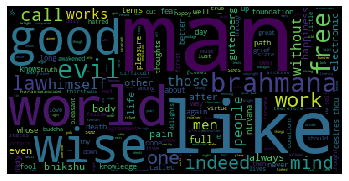

In [ ]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()